In [2]:
#!pip install seaborn
import numpy as np
import pandas as pd
import requests
from urllib.parse import quote
import folium, json
import seaborn as sns


In [3]:
data = pd.read_csv('../daou/danawa_crawling_result_강사님.csv')
#data = pd.read_csv('../daou/danawa_crawling_result.csv')
data.head()
#data.info()

,상품명,스펙 목록,가격
0,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,458920
1,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",48360
2,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1038980
3,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔...,539990
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63330


In [4]:
# 회사명 모델명 분리
company_list = []
product_list = []
for i in data.상품명:
    i_info = i.split(" ", 1)   # 1을 넣어야 앞에 한개 공백만 분리
    company = i_info[0]
    product = i_info[1]
    company_list.append(company)
    product_list.append(product)

#product_list
#company_list


In [5]:
# .. 스펙목록 분리(카테고리, 사용시간, 흡입력)
spec_list = data['스펙 목록'][0].split('/')

# 
category_list = []
use_time_list = []
suction_list = []

use_time = None
suction = None
category = None

for spec_data in data['스펙 목록']:

    # 스펙분리
    spec_list = spec_data.split(' / ')

    # 카테고리 추출
    category = spec_list[0]
    category_list.append(category)

    # 사용시간, 흡입력 추출
    for spec in spec_list:
        if '사용시간' in spec:
            use_time = spec.split(":")[1].strip()
        elif '흡입력' in spec:
            suction = spec.split(":")[1].strip()
    use_time_list.append(use_time)
    suction_list.append(suction)

In [6]:
print('카테고리', len(category_list), category_list[0:5])
print('사용시간', len(use_time_list), use_time_list[0:5])
print('흡입력', len(suction_list), suction_list[0:5])


# --> 시간, 흡입력 단위가 다름

카테고리 400 ['핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기', '차량용청소기']
사용시간 400 ['1시간', '45분', '1시간', '1시간', '30분']
흡입력 400 ['210W', '15,000Pa', '220W', '220W', '16,800Pa']


In [7]:
# 시간단위 통일
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [8]:
cvrt_use_time_list = [ convert_time_minute(i) for i in use_time_list ]
cvrt_use_time_list

[60,
 45,
 60,
 60,
 30,
 35,
 60,
 60,
 60,
 25,
 60,
 60,
 None,
 60,
 60,
 60,
 50,
 60,
 60,
 32,
 60,
 None,
 60,
 60,
 None,
 180,
 60,
 None,
 60,
 60,
 70,
 60,
 30,
 60,
 30,
 22,
 60,
 60,
 60,
 45,
 60,
 60,
 60,
 30,
 10,
 60,
 40,
 65,
 60,
 60,
 60,
 None,
 20,
 20,
 12,
 40,
 50,
 30,
 60,
 60,
 50,
 30,
 50,
 60,
 60,
 50,
 60,
 20,
 25,
 48,
 60,
 60,
 60,
 15,
 60,
 60,
 60,
 60,
 45,
 None,
 60,
 45,
 17,
 60,
 24,
 50,
 50,
 35,
 None,
 None,
 60,
 53,
 45,
 60,
 60,
 25,
 50,
 50,
 48,
 48,
 60,
 42,
 60,
 30,
 20,
 60,
 50,
 20,
 60,
 60,
 40,
 60,
 20,
 48,
 30,
 180,
 60,
 50,
 48,
 120,
 33,
 60,
 20,
 30,
 60,
 35,
 35,
 53,
 60,
 15,
 60,
 70,
 90,
 60,
 15,
 60,
 20,
 35,
 40,
 60,
 50,
 30,
 240,
 28,
 13,
 15,
 15,
 40,
 30,
 48,
 23,
 20,
 25,
 40,
 20,
 7,
 None,
 12,
 60,
 100,
 20,
 20,
 45,
 25,
 25,
 45,
 17,
 17,
 60,
 240,
 None,
 30,
 10,
 20,
 35,
 12,
 50,
 20,
 45,
 None,
 30,
 40,
 90,
 45,
 15,
 60,
 28,
 60,
 45,
 80,
 80,
 80,
 60,
 40,
 50

In [9]:
# 흡입력 통이 W = 100Pa, W 지우기
def convert_suction_unit(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('A', '').replace('W','')
            result = int(result.replace(',',""))
        elif 'PA' in value:
            result = value.replace('PA',"")
            result = int(int(result.replace(',',''))/100)
        else:
            result = None
        return result    
    except:
        return None

In [10]:
cvrt_suction_list = [ convert_suction_unit(i) for i in  suction_list ]
cvrt_suction_list

[210,
 150,
 220,
 220,
 168,
 168,
 200,
 200,
 210,
 None,
 None,
 220,
 None,
 220,
 220,
 None,
 300,
 151,
 220,
 160,
 210,
 130,
 210,
 220,
 150,
 150,
 220,
 130,
 220,
 210,
 262,
 210,
 200,
 210,
 70,
 52,
 150,
 220,
 200,
 200,
 200,
 210,
 210,
 210,
 210,
 220,
 400,
 150,
 210,
 210,
 210,
 160,
 50,
 120,
 120,
 80,
 80,
 200,
 210,
 200,
 150,
 120,
 120,
 250,
 210,
 210,
 220,
 80,
 168,
 390,
 210,
 240,
 220,
 50,
 220,
 220,
 200,
 210,
 370,
 80,
 80,
 150,
 120,
 185,
 185,
 180,
 55,
 55,
 170,
 150,
 210,
 210,
 210,
 220,
 150,
 35,
 280,
 None,
 None,
 100,
 200,
 200,
 220,
 100,
 None,
 220,
 150,
 65,
 220,
 130,
 100,
 100,
 55,
 55,
 55,
 55,
 200,
 150,
 180,
 180,
 180,
 220,
 60,
 50,
 220,
 220,
 220,
 220,
 200,
 200,
 240,
 250,
 270,
 220,
 220,
 210,
 50,
 80,
 350,
 350,
 350,
 150,
 150,
 150,
 30,
 30,
 58,
 150,
 120,
 120,
 52,
 65,
 48,
 48,
 60,
 60,
 None,
 130,
 150,
 150,
 30,
 120,
 120,
 35,
 45,
 45,
 80,
 80,
 210,
 210,
 None,
 

In [11]:
# 전처리 결과 엑셀로 저장
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = cvrt_use_time_list
pd_data['흡입력'] = cvrt_suction_list
pd_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),48360,45.0,150.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1038980,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),63330,30.0,168.0
...,...,...,...,...,...,...
395,핸디스틱청소기,다이슨,V11 컴플리트,938360,60.0,185.0
396,핸디스틱청소기,DIBEA,D18,119960,45.0,90.0
397,핸디스틱청소기,캐치웰,CX11 PLUS,152150,60.0,200.0
398,차량용청소기,휴대용,청소기 트리플블랙 Z5,47710,15.0,50.0


In [12]:
pd_data.to_csv('../daou/다나와시각화입력자료', index=False)

In [13]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             221
차량용청소기               89
물걸레청소기               31
핸디청소기                30
스틱청소기                 7
욕실청소기                 7
침구청소기                 5
핸디/스틱청소기+로봇청소기세트      3
업소용청소기                3
차량용선풍기                1
핸디/스틱청소기+공기청정기세트      1
수영장청소기                1
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

카테고리만 뽑아서 분석
* 가격, 사용시간, 흡입력 평균
* 3가지 평균 이상 제품만 출력

In [14]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
pd_data_final

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1038980,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
5,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,160080,35.0,168.0
6,핸디스틱청소기,LG전자,코드제로 A9S AT9200BA,576860,60.0,200.0
...,...,...,...,...,...,...
392,핸디스틱청소기,샤오미,Lydsto H4,369000,23.0,250.0
395,핸디스틱청소기,다이슨,V11 컴플리트,938360,60.0,185.0
396,핸디스틱청소기,DIBEA,D18,119960,45.0,90.0
397,핸디스틱청소기,캐치웰,CX11 PLUS,152150,60.0,200.0


In [15]:
pd_data_final.to_csv('../daou/2_result_preprocessing.csv', index=False)

* 흡입력 기준 순위 정렬

In [16]:
# 결측치 확인
pd_data_final.isnull().sum()

카테고리    0
회사명     0
제품      0
가격      0
사용시간    1
흡입력     2
dtype: int64

In [ ]:
# 흡입력 기준순위
top_list = pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

In [ ]:
# 1.사용시간, 2.흡입력 기준 순위
top_list2 = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list2

In [27]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()

price_mean_value, suction_mean_value, use_time_mean_value

(376040.85972850677, 178.44292237442923, 47.872727272727275)

In [35]:
# .. 가성비 좋은 제품 선택, [가격] 평균 and [흡입력, 사용시간] 평균 이상
mask = (pd_data_final['가격'] <= price_mean_value) & (pd_data_final['흡입력'] >= suction_mean_value) & (pd_data_final['사용시간'] >= use_time_mean_value)
filtered_data = pd_data_final[mask].sort_values(['가격','사용시간'], ascending=True)

filtered_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
118,핸디스틱청소기,샤오미,TROUVER SOLO10,77320,48.0,180.0
240,핸디스틱청소기,델로라,V11 파워 300W,84370,70.0,220.0
116,핸디스틱청소기,샤오미,드리미 V9,104360,60.0,200.0
63,핸디스틱청소기,샤오미,COCLEAN V30,123600,60.0,250.0
276,핸디스틱청소기,DIBEA,올인원25000,129000,55.0,250.0


데이터 시각화
* xy좌표[사용시간, 흡입력], 가격은 원의 크기로

In [37]:
# null 제거
chart_data = pd_data_final.dropna(axis = 0)
print(pd_data_final.shape, chart_data.shape)

(221, 6) (218, 6)


In [38]:
# 흡입력, 사용시간의 최대값과 최소값 정리
price_max = pd_data_final['가격'].max()
price_min = pd_data_final['가격'].min()
suction_max = pd_data_final['흡입력'].max()
suction_min = pd_data_final['흡입력'].min()
use_time_max = pd_data_final['사용시간'].max()
use_time_min = pd_data_final['사용시간'].min()

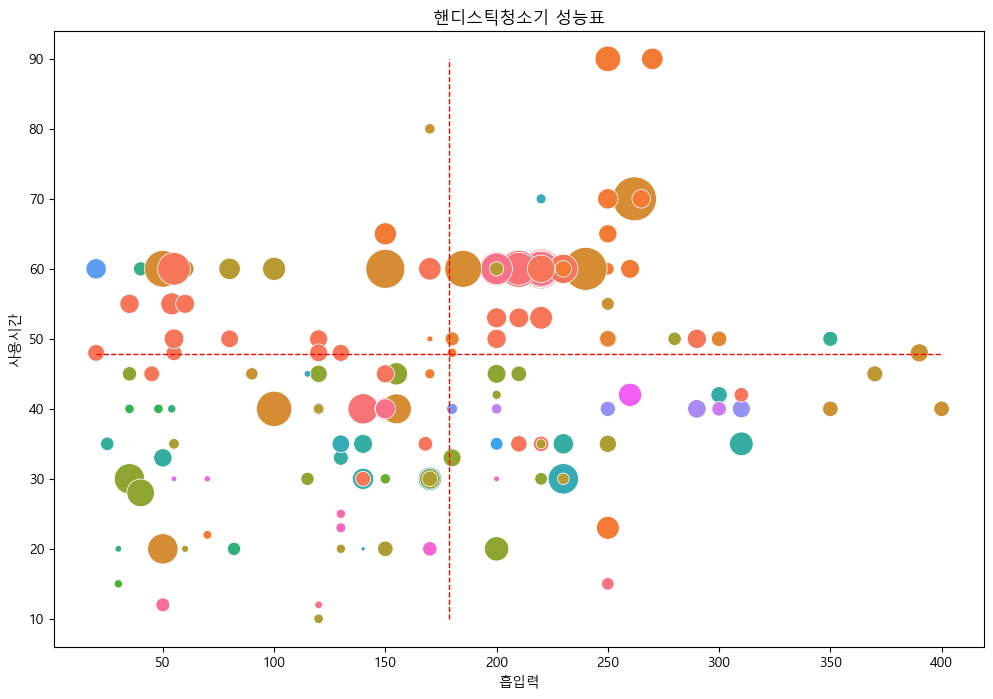

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12,8))
plt.title('핸디스틱청소기 성능표')
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue= chart_data['회사명'],
                data=chart_data, sizes=(10,1000), legend=False)
# x,y 평균선
plt.plot([suction_min, suction_max], [use_time_mean_value, use_time_mean_value], 'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [use_time_min, use_time_max], 'r--', lw=1)
plt.show()

인기 제품 데이터 시각화, 가격 Top 10[평균이상]

In [52]:
filtered_data[:10]

,카테고리,회사명,제품,가격,사용시간,흡입력
118,핸디스틱청소기,샤오미,TROUVER SOLO10,77320,48.0,180.0
240,핸디스틱청소기,델로라,V11 파워 300W,84370,70.0,220.0
116,핸디스틱청소기,샤오미,드리미 V9,104360,60.0,200.0
63,핸디스틱청소기,샤오미,COCLEAN V30,123600,60.0,250.0
276,핸디스틱청소기,DIBEA,올인원25000,129000,55.0,250.0
96,핸디스틱청소기,원더스리빙,원더스 다이나킹 Z24,139000,50.0,280.0
85,핸디스틱청소기,아이닉,i20 엘리트,149000,50.0,180.0
397,핸디스틱청소기,캐치웰,CX11 PLUS,152150,60.0,200.0
11,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0
75,핸디스틱청소기,삼성전자,파워스틱 VS02R6512JG,167910,60.0,220.0


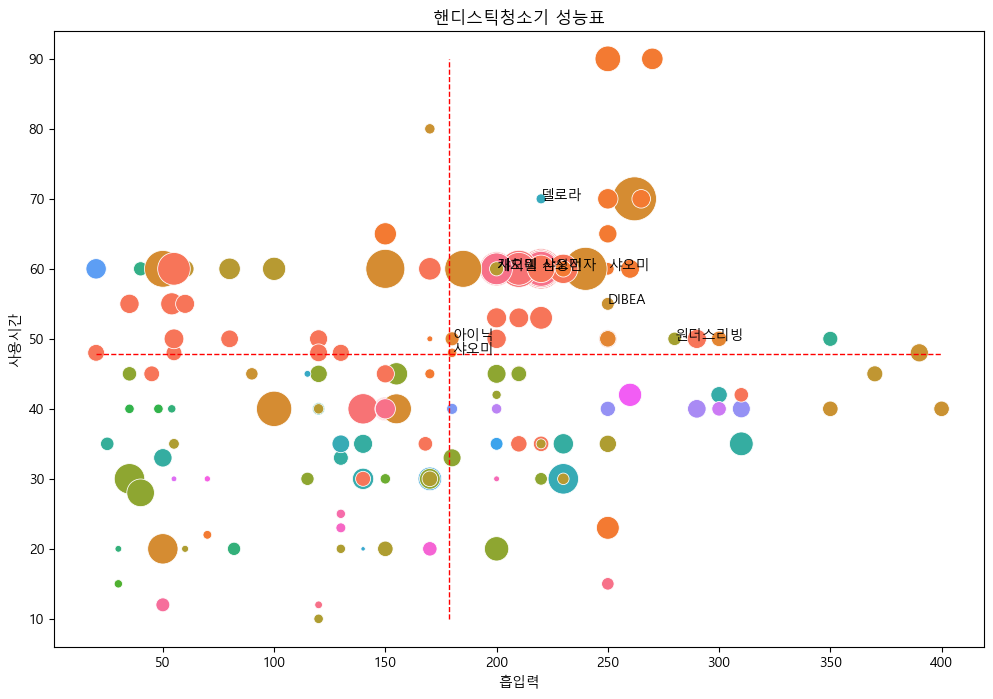

In [56]:
plt.figure(figsize=(12,8))
plt.title('핸디스틱청소기 성능표')
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue= chart_data['회사명'],
                data=chart_data, sizes=(10,1000), legend=False)
# x,y 평균선
plt.plot([suction_min, suction_max], [use_time_mean_value, use_time_mean_value], 'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [use_time_min, use_time_max], 'r--', lw=1)

for index, row in filtered_data[:10].iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['회사명'].split(" ")[0]
    plt.text(x, y, s, size=10)
plt.show()